In [1]:
import numpy as np

In [2]:
from lenstronomy.LensModel.lens_model import LensModel
import lensinggw.constants.constants as const
from lensinggw.utils.utils import param_processing

In [3]:
import sys
import os
path = os.getcwd()
dir = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(dir)

In [4]:
import wolensing.amplification_factor.amplification_factor as af

In [5]:
"""
Testing standard SIS model
"""
zS, zL = 1., 0.5
mL1 = 1e3
G = const.G  # gravitational constant [m^3 kg^-1 s^-2]
c = const.c  # speed of light [m/s]
M_sun = const.M_sun  # Solar mass [Kg]
df = 0.25
textendmax = 1/df
tlength = .13
textend = textendmax-tlength
thetaE = param_processing(zL, zS, mL1)
beta0, beta1 = 0.1 * thetaE, 0 * thetaE
eta10, eta11 = 0 * thetaE, 0 * thetaE
eta0, eta1 = 0., 0.
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE}
kwargs_lens_list = [kwargs_sis_1]
lens_model_complete = LensModel(lens_model_list=lens_model_list)
T = lens_model_complete.fermat_potential
T0 = thetaE ** (-2) * T(0, 0, kwargs_lens_list, beta0, beta1)#[0]
Tscale = 4 * (1 + zL) * mL1 * M_sun * G / c ** 3
mL3 = 10
thetaE3 = param_processing(zL, zS, mL3)
kwargs_macro = {'source_pos_x': beta0,
                'source_pos_y': beta1,
                'theta_E': thetaE,
                'mu': 1,
               }
kwargs_integrator = {'PixelNum': int(20000),
                     'PixelBlockMax': 2000,
                     'WindowSize': 1.*210*thetaE3,
                     'WindowCenterX': 0,
                     'WindowCenterY': 0,
                     'T0': T0,
                     'TimeStep': 1e-5/Tscale, 
                     'TimeMax': T0 + 1./Tscale,
                     'TimeMin': T0 - .1/Tscale,
                     'TimeLength': tlength/Tscale,
                     'TExtend': 10/Tscale,
                     'LastImageT': .02/Tscale,
                     'Tbuffer': 0,
                     'Tscale': Tscale}
amplification = af.amplification_factor(lens_model_list=lens_model_list, kwargs_lens=kwargs_lens_list, kwargs_macro=kwargs_macro, **kwargs_integrator)

In [7]:
sis_amp = amplification

In [8]:
fixed_ts = np.loadtxt('../../test/test_sis_ts.txt')
fixed_F_tilde = np.loadtxt('../../test/test_sis_F_tilde.txt')

In [9]:
sis_amp.importor(time=True, ts=fixed_ts, F_tilde=fixed_F_tilde)
amp_fs, amp_Fws = sis_amp.fourier()

total time 10.129980000000002


In [10]:
print(amp_fs[-1])

1999.905231797101


<Figure size 432x288 with 0 Axes>

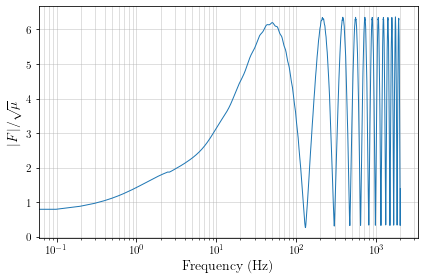

<AxesSubplot:xlabel='Frequency (Hz)', ylabel='$|F|/\\sqrt{\\mu}$'>

In [11]:
sis_amp.plot_freq()

In [13]:
print(np.abs(amp_Fws[0:10]))

[0.         0.9042884  1.16471047 1.11018838 1.20316572 1.22458012
 1.2864794  1.31721499 1.36638468 1.39789448]


In [14]:
np.savetxt('./test_sis_Fws.txt', amp_Fws)